In [41]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings
from sklearn import linear_model
from scipy.stats.mstats import winsorize

In [42]:
df_train = pd.read_csv("train.csv")

In [43]:
df_train.shape

(1460, 81)

In [44]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


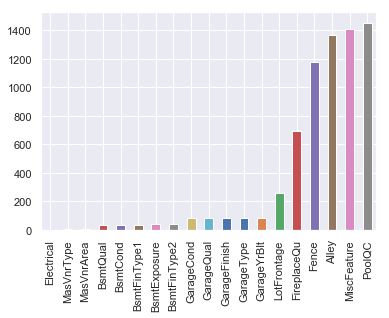

In [45]:
missing =df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [46]:
df_train = df_train.drop([ 'PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu','LotFrontage'], axis = 1)
df_train = df_train.dropna()

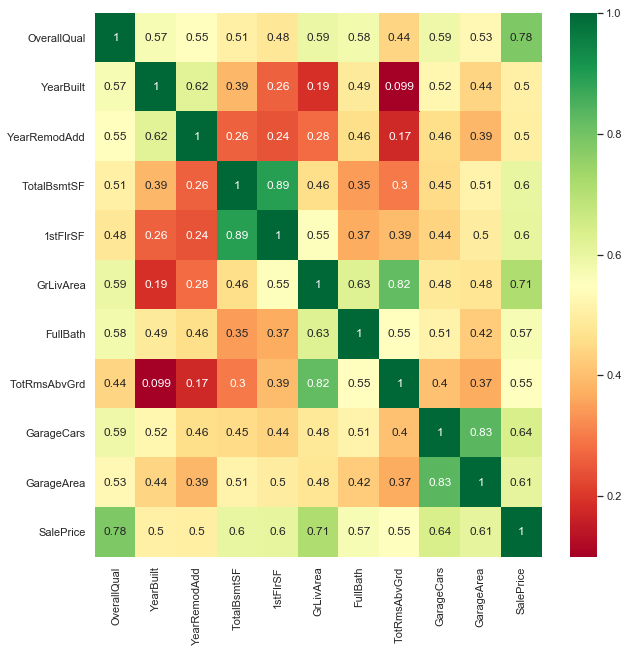

In [47]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
dff = df_train[['GrLivArea', 'OverallQual', 'GarageCars', 'SalePrice']]

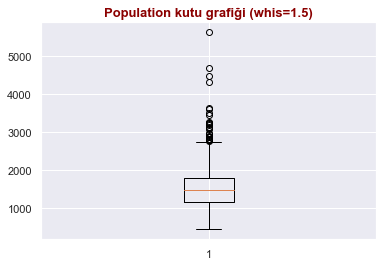

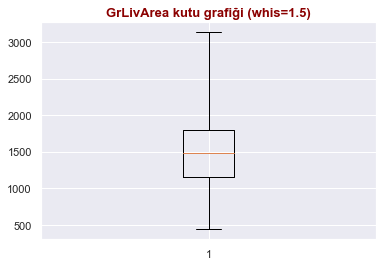

In [55]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(dff["GrLivArea"],whis=1.5)
plt.title("Population kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

winsorize_GrLivArea= winsorize(dff["GrLivArea"], (0 , 0.01))

winsorize_GrLivArea

plt.boxplot(winsorize_GrLivArea,whis=4)
plt.title("GrLivArea kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

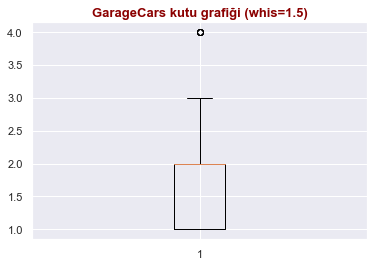

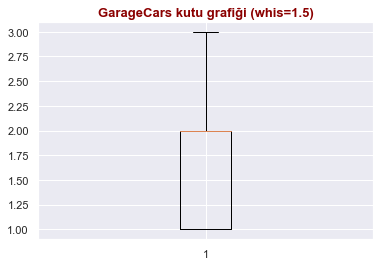

In [57]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(dff["GarageCars"],whis=1.5)
plt.title("GarageCars kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

winsorize_GarageCars= winsorize(dff["GarageCars"], (0 , 0.01))

winsorize_GarageCars

plt.boxplot(winsorize_GarageCars,whis=4)
plt.title("GarageCars kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [58]:
dff.head()

,GrLivArea,OverallQual,GarageCars,SalePrice
0,1710,7,2,208500
1,1262,6,2,181500
2,1786,7,2,223500
3,1717,7,3,140000
4,2198,8,3,250000


In [59]:
Y = dff[['SalePrice']]
X = dff[['GrLivArea','OverallQual', 'GarageCars']]

In [60]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)
tahmin = lrm.predict(X)
print('Değişkenler:', lrm.coef_)
print('Sabit değer (bias): ', lrm.intercept_)

Değişkenler: [[   51.37711731 27535.69072333 25205.94889448]]
Sabit değer (bias):  [-110671.17154957]


In [73]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1221.
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        15:26:20   Log-Likelihood:                -16102.
No. Observations:                1338   AIC:                         3.221e+04
Df Residuals:                    1334   BIC:                         3.223e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.107e+05   5368.231    -20.616      0.000   -1.21e+05      -1e+05
GrLivArea      51.3771      2.724     18.861      0.000      46.033      56.721
OverallQual  2.754e+04   1162.430     23.688      0.000    2.53e+04    2.98e+04
GarageCars   2.521e+04   2230.442     11.301      0.000    2.08e+04    2.96e+04
==============================================================================
Omnibus:                      359.008   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9184.846
Skew:                           0.648   Prob(JB):                         0.00
Kurtosis:                      15.770   Cond. No.                     7.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""